In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as random
from scipy.signal import convolve
import scipy
from joblib import Parallel, delayed
import time
from scipy import sparse
from tqdm import tqdm, tqdm_notebook

%run ../initMethods_sparse.py
%run ../makeGif.py
%run ../methods_parallel_sparse.py

In [17]:
params = { #parameters relevant for the equations
    "Nh":           10000,
    "N0":            1000,
    "M":                1, #Also L, total number of spacers
    }
sim_params = { #parameters relevant for the simulation (including Inital Valuess)
    "xdomain":                    100,
    "dx":                           1,
    "initial_mean_n":           [0,-20],
    "initial_var_n":               10,
    "initial_mean_nh":         [0,20],
    "initial_var_nh":              10,
    "num_threads":                  4,
    "tail_axis":               [1, 1],
    }

In [18]:
nh = init_guassian(params["Nh"], sim_params, "nh")

n = init_guassian(params["N0"], sim_params, "n")

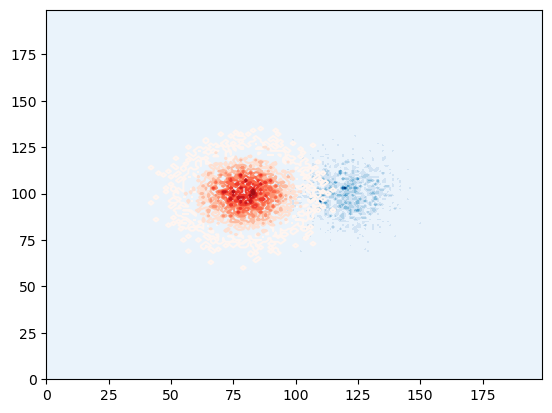

In [19]:
plt.contour(nh.todense(), cmap="Reds")
plt.contourf(n.todense(), cmap="Blues")
plt.show()

In [20]:
nh_new = immunity_update_parallel(nh, n, params, sim_params)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all().

In [34]:
np.sum(nh.todense())

10000

In [38]:
np.all(nh < 0)

<200x200 sparse matrix of type '<class 'numpy.bool_'>'
	with 0 stored elements in Compressed Sparse Row format>